In [1]:
import numpy as np
import pandas as pd
import requests
from cfbd.rest import ApiException
import cfbd
import json

In [2]:
dataset = pd.DataFrame()

In [3]:
# # Configure API key authorization: ApiKeyAuth
# configuration = cfbd.Configuration()
# configuration.api_key['Authorization'] = '+eiRK37qNRqjoDcgyigTAWo4QyGrMtYR1o/hifwQmzj8hO1OwzwDdbjRnJKfSr2t'
# configuration.api_key_prefix['Authorization'] = 'Bearer'

# for year in range (2021, 2025):
#     api_config = cfbd.ApiClient(configuration)
#     for week in range (1,16):
#         response = plays = cfbd.PlaysApi(api_config).get_plays(year=year, week=week, offense='Michigan')
#         data = (pd.DataFrame.from_records([p.to_dict() for p in plays]))
#         dataset = pd.concat([dataset, data]) 
          
      
# dataset

In [51]:

# Configure API key authorization: ApiKeyAuth
configuration = cfbd.Configuration()
configuration.api_key['Authorization'] = '+eiRK37qNRqjoDcgyigTAWo4QyGrMtYR1o/hifwQmzj8hO1OwzwDdbjRnJKfSr2t'
configuration.api_key_prefix['Authorization'] = 'Bearer'
# Uncomment below to setup prefix (e.g. Bearer) for API key, if needed
# configuration.api_key_prefix['Authorization'] = 'Bearer'

# create an instance of the API class
api_instance = cfbd.StatsApi(cfbd.ApiClient(configuration))
#year = 2023 # int | Year filter (required if no team specified) (optional)
team = 'michigan' # str | Team filter (required if no year specified) (optional)
#conference = 'conference_example' # str | Conference abbreviation filter (optional)
#start_week = 0 # int | Starting week filter (optional)
#end_week = 12 # int | Starting week filter (optional)

for year in range (2021, 2025):
    print(year)
    # Team statistics by season
    api_response = api_instance.get_team_season_stats(year=year, team=team)
    data = (pd.DataFrame.from_records([p.to_dict() for p in api_response]))
    dataset = pd.concat([dataset, data]) 

dataset.head(100)

2021
2022
2023
2024


,season,team,conference,stat_name,stat_value
0,2021,Michigan,Big Ten,netPassingYards,3202
1,2021,Michigan,Big Ten,kickReturnTDs,1
2,2021,Michigan,Big Ten,passingTDs,21
3,2021,Michigan,Big Ten,puntReturnYards,364
4,2021,Michigan,Big Ten,thirdDownConversions,87
...,...,...,...,...,...
31,2023,Michigan,Big Ten,interceptions,5
0,2024,Michigan,Big Ten,fumblesRecovered,4
1,2024,Michigan,Big Ten,passAttempts,242
2,2024,Michigan,Big Ten,tacklesForLoss,61


In [54]:
gp_2022 = 14
gp_2023 = 15
gp_2024 = 10

In [56]:
data2022 = dataset[dataset['season'] == 2022]
data2023 = dataset[dataset['season'] == 2023]
data2024 = dataset[dataset['season'] == 2024]

In [57]:
data2022['avg'] = round((data2022['stat_value']/gp_2022), 2)
data2023['avg'] = round((data2023['stat_value']/gp_2023), 2)
data2024['avg'] = round((data2024['stat_value']/gp_2024), 2)

/var/folders/gc/l9nrmd0j3fxcb8_827d4qyk40000gn/T/ipykernel_10586/2072799299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2022['avg'] = round((data2022['stat_value']/gp_2022), 2)
/var/folders/gc/l9nrmd0j3fxcb8_827d4qyk40000gn/T/ipykernel_10586/2072799299.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2023['avg'] = round((data2023['stat_value']/gp_2023), 2)
/var/folders/gc/l9nrmd0j3fxcb8_827d4qyk40000gn/T/ipykernel_10586/2072799299.py:3: SettingWithCopyWarning: 
A value is trying to be set

In [62]:
dataset['stat_name'].unique()

array(['netPassingYards', 'kickReturnTDs', 'passingTDs',
       'puntReturnYards', 'thirdDownConversions', 'interceptionTDs',
       'passCompletions', 'puntReturnTDs', 'totalYards',
       'passesIntercepted', 'rushingTDs', 'penalties', 'rushingAttempts',
       'interceptions', 'interceptionYards', 'tacklesForLoss',
       'kickReturns', 'fumblesLost', 'puntReturns',
       'fourthDownConversions', 'penaltyYards', 'fumblesRecovered',
       'possessionTime', 'thirdDowns', 'sacks', 'kickReturnYards',
       'firstDowns', 'fourthDowns', 'games', 'passAttempts', 'turnovers',
       'rushingYards'], dtype=object)

In [70]:
uni_2022 = data2022[data2022['stat_name'].isin(['rushingYards', 'netPassingYards'])]
uni_2022 = uni_2022.drop_duplicates()

uni_2023 = data2023[data2023['stat_name'].isin(['rushingYards', 'netPassingYards'])]
uni_2023 = uni_2023.drop_duplicates()

uni_2024 = data2024[data2024['stat_name'].isin(['rushingYards', 'netPassingYards'])]
uni_2024 = uni_2024.drop_duplicates()


In [75]:
combined_df = pd.concat([uni_2022, uni_2023, uni_2024])
combined_df = combined_df.reset_index()
combined_df.head(10)

,index,season,team,conference,stat_name,stat_value,avg
0,6,2022,Michigan,Big Ten,rushingYards,3344,238.86
1,31,2022,Michigan,Big Ten,netPassingYards,3078,219.86
2,4,2023,Michigan,Big Ten,rushingYards,2536,169.07
3,24,2023,Michigan,Big Ten,netPassingYards,3205,213.67
4,22,2024,Michigan,Big Ten,netPassingYards,1346,134.60
5,23,2024,Michigan,Big Ten,rushingYards,1557,155.70


In [102]:
combined_df = combined_df.sort_values(by=['season', 'stat_name'])

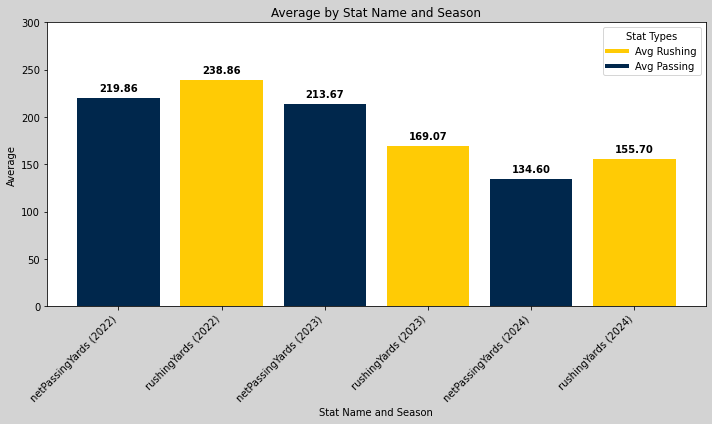

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D  # For custom legend entries

df = combined_df

# Combine `stat_name` and `season` for x-axis labels
df['label'] = df['stat_name'] + " (" + df['season'].astype(str) + ")"

# Plot the bar chart with a lighter grey background
plt.figure(figsize=(10, 6), facecolor='lightgrey')

# Create bars with different colors (Maize for Rushing and Blue for Passing)
bars = plt.bar(df['label'], df['avg'], color=['#FFCB05' if stat == 'rushingYards' else '#00274C' for stat in df['stat_name']])

# Add labels and title
plt.xlabel('Stat Name and Season')
plt.ylabel('Average')
plt.title('Average by Stat Name and Season')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Display the avg value at the top of each bar, closer to the bar
for bar, avg in zip(bars, df['avg']):
    yval = bar.get_height()  # Get the height of the bar (y-value)
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 5,  # Adjust the vertical position (lower the text)
             f'{avg:.2f}', ha='center', va='bottom', color='black', fontweight='bold')

# Manually set the y-axis limit to 300
plt.ylim(0, 300)  # Set the limit from 0 to 300 on the y-axis

# Create a custom legend for "Avg Rushing" and "Avg Passing"
legend_elements = [
    Line2D([0], [0], color='#FFCB05', lw=4, label='Avg Rushing'),  # Maize color for Rushing
    Line2D([0], [0], color='#00274C', lw=4, label='Avg Passing')   # Blue color for Passing
]

# Add the legend with custom entries
plt.legend(handles=legend_elements, title='Stat Types', loc='upper right')

#Save the plot:
plt.savefig('average_stats_by_season.png', format='png', dpi=300, bbox_inches='tight')  # `bbox_inches='tight'` ensures everything is included in the saved image
# Show the plot
plt.tight_layout()  # Adjust layout to avoid label overlap
plt.show()


In [96]:
#Save the plot:
plt.savefig('average_stats_by_season.png', format='png')  # Saves as a PNG file with 300 dpi resolution

<Figure size 432x288 with 0 Axes>